# CDP Droplet Distributions

Read the Univ. of North Dakota ```counts.cdp.1Hz``` and ```conc.cdp.1Hz``` files for analysis.  
The bottom of this notebook also combines the DSDs with PSDs processed using UIOOPS.

In [1]:
import sys
sys.path.append('../../src')

import xarray as xr
import pandas as pd
import numpy as np
import proplot as pplt
pplt.rc.update(
    suptitlesize=16, suptitleweight='bold', fontsize=14, ticklabelsize=14,
    ticklen=8, ticklenratio=0.5, colorbarwidth='1em',
    figurefacecolor='w', savefigtransparent=False
)
from impacts_tools import p3

## Read CDP Count and Concentration Datasets for Flight

Using 12 Feb 2023 as an example.

In [2]:
date = '2023-02-12'
datestr = date.replace('-', '')
fname_cdp_ct = ('23_02_12_13_28_10.counts.cdp.1Hz')
fname_cdp_conc = ('23_02_12_13_28_10.conc.cdp.1Hz')

cdp = p3.Cdp(fname_cdp_ct, fname_cdp_conc, date, tres='5S')
cdp.data

<xarray.Dataset>
Dimensions:     (time: 4631, size: 30)
Coordinates:
    bin_center  (size) float64 2.5 3.5 4.5 5.5 6.5 ... 41.0 43.0 45.0 47.0 49.0
    bin_left    (size) float64 2.0 3.0 4.0 5.0 6.0 ... 40.0 42.0 44.0 46.0 48.0
    bin_right   (size) float64 3.0 4.0 5.0 6.0 7.0 ... 42.0 44.0 46.0 48.0 50.0
    bin_width   (size) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0 2.0
  * time        (time) datetime64[ns] 2023-02-12T13:28:10 ... 2023-02-12T19:5...
Dimensions without coordinates: size
Data variables:
    count       (size, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ND          (size, time) float64 75.0 nan nan nan 74.0 ... nan nan nan nan
    sv          (time) float64 13.0 13.35 13.38 13.45 ... 15.3 15.28 15.26 9.156
    n           (time) float64 0.04667 0.01497 0.02239 0.04458 ... 0.0 0.0 0.0
    lwc         (time) float64 6.7e-05 1e-06 4.4e-06 0.001062 ... 0.0 0.0 0.0
    dm          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    dmv         (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    re          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    dm_std      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Experiment:     IMPACTS
    Date:           2023-02-12
    Aircraft:       P-3
    Data Contact:   David Delene (david.delene@und.edu)
    Instrument PI:  David Delene (david.delene@und.edu)
    Mission PI:     Lynn McMurdie (lynnm@uw.edu)

## Plot CDP Bulk Variables

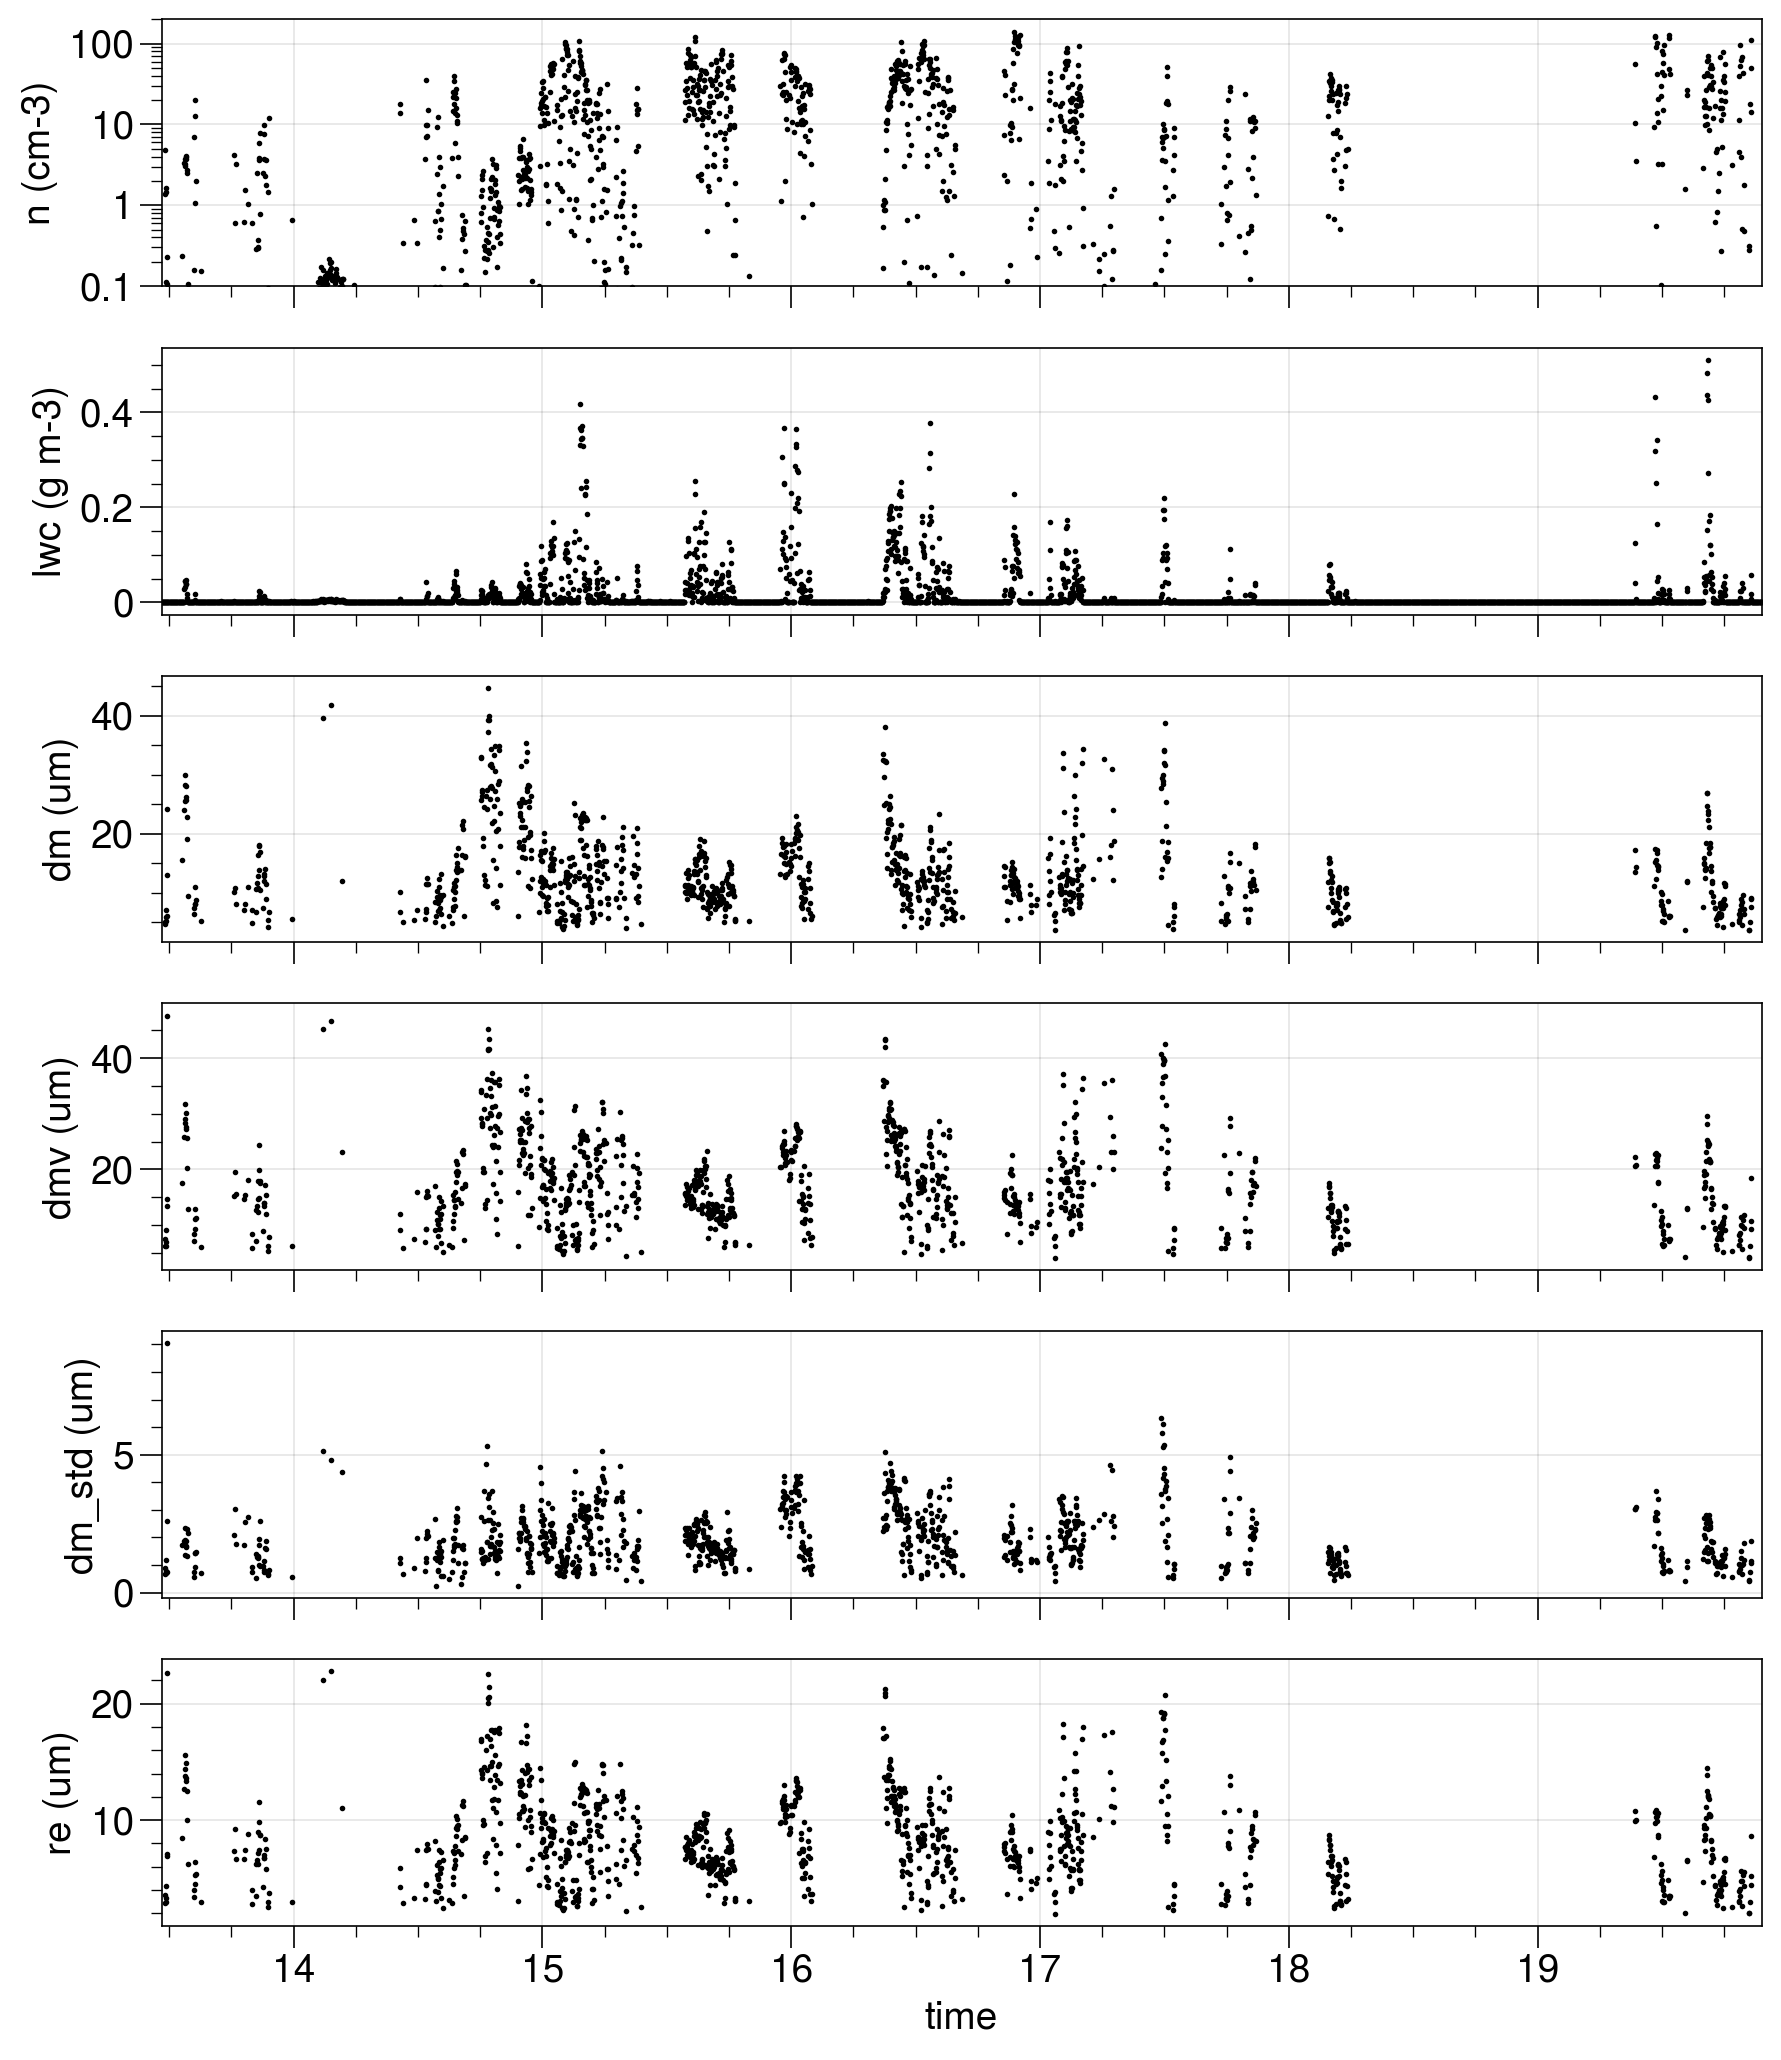

In [3]:
fig, axs = pplt.subplots(nrows=6, refwidth=8, refaspect=6, sharey=False)

for i, var in enumerate(['n', 'lwc', 'dm', 'dmv', 'dm_std', 're']):
    ax = axs[i]
    ax.plot(cdp.data.time, cdp.data[var], 'k.', ms=2)
    if var == 'n':
        ax.format(ylim=(0.1, 200), yscale='log')
axs.format(xrotation=0, xlocator='hour', xformatter='%H')

## Combine DSD and PSD

Focus on a select time period.

In [4]:
fname_2ds = ('sd_v1.20230212.2DS.V.nc')
fname_hvps = ('sd_v1.20230212.HVPS.V.nc')

start = np.datetime64(f'{date}T14:30:00')
end = np.datetime64(f'{date}T15:00:00')
psd = p3.Psd(
    fname_2ds, fname_hvps, date, start_time=start, end_time=end, tres='5S',
    binlims=(0.04, 1, 1.4, 30))
psd.data

<xarray.Dataset>
Dimensions:           (time: 360, size: 41)
Coordinates:
    bin_center        (size) float64 0.05 0.07 0.09 0.1125 ... 19.0 22.5 27.5
    bin_left          (size) float64 0.04 0.06 0.08 0.1 ... 16.0 18.0 20.0 25.0
    bin_right         (size) float64 0.06 0.08 0.1 0.125 ... 18.0 20.0 25.0 30.0
    bin_width         (size) float64 0.002 0.002 0.002 0.0025 ... 0.2 0.5 0.5
    weight_2ds        (size) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    weight_hvps       (size) float64 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
  * time              (time) datetime64[ns] 2023-02-12T14:30:00 ... 2023-02-1...
Dimensions without coordinates: size
Data variables:
    count             (size, time) float64 1.0 0.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    sv                (size, time) float64 1.135e+04 1.14e+04 ... 2.182e+06
    ND                (size, time) float64 nan nan nan 0.04348 ... nan nan nan
    area_ratio        (size, time) float64 nan nan nan nan ... nan nan nan nan
    aspect_ratio      (size, time) float64 nan nan nan nan ... nan nan nan nan
    active_time_2ds   (time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    active_time_hvps  (time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

First plot a time series of the combined distribution.

/home/disk/meso-home/jfinlon/anaconda3/envs/impacts/lib/python3.9/site-packages/proplot/axes/plot.py:1275: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  obj = getattr(super(), name)(*args, **kwargs)


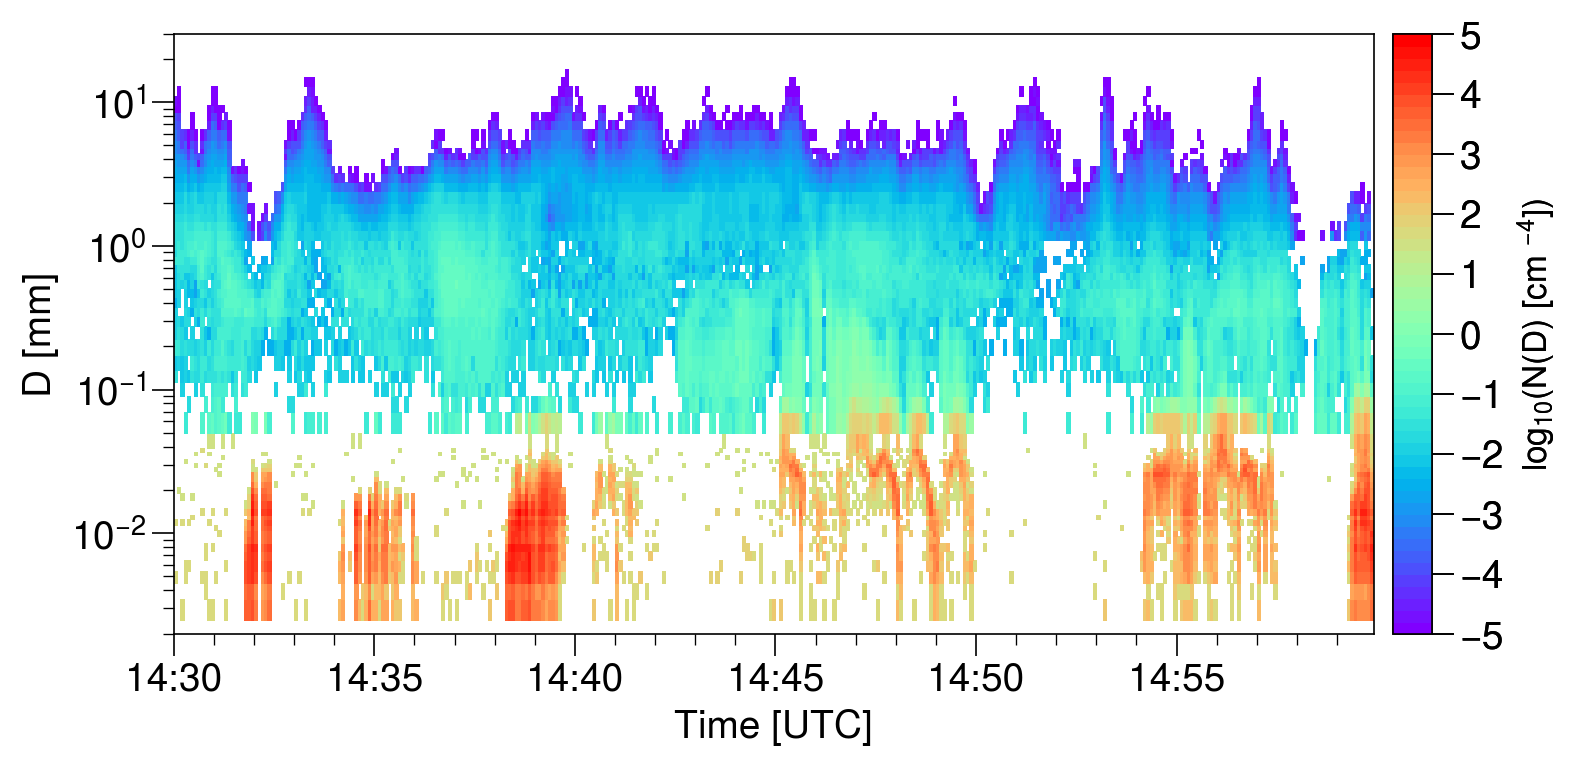

In [5]:
# combine DSD (to 40 um) and PSD (above 40 um)
cdp_sub = cdp.data.sel(time=psd.data.time).isel(size=range(25))
bin_center = np.append(
    cdp_sub.bin_center.values / 10**3, psd.data.bin_center.values
)
ND = np.append(cdp_sub.ND.values, psd.data.ND.values, axis=0)

fig, ax = pplt.subplots(refwidth=6, refaspect=2)
ax.pcolormesh(
    psd.data.time, bin_center, np.log10(ND),
    levels=np.linspace(-5, 5, 51), cmap='rainbow', colorbar='r',
    colorbar_kw={
        'ticks':1, 'width':'1em', 'extendsize':'0em',
        'labelsize':12, 'label':'log$_{10}$(N(D) [cm $^{-4}$])'
    }
)
ax.format(
    xlabel='Time [UTC]', xrotation=0, xformatter='%H:%M',
    xlocator=('minute', range(0, 60, 5)), xminorlocator='minute',
    ylabel='D [mm]', ylim=(2e-3, 30), yscale='log', yformatter='log'
)

Plot a mean distribution for the above 15-minute period.

/tmp/ipykernel_667933/3063339270.py:11: RuntimeWarning: Mean of empty slice
  ax.step(bin_center, np.nanmean(ND, axis=1), c='k', where='mid')


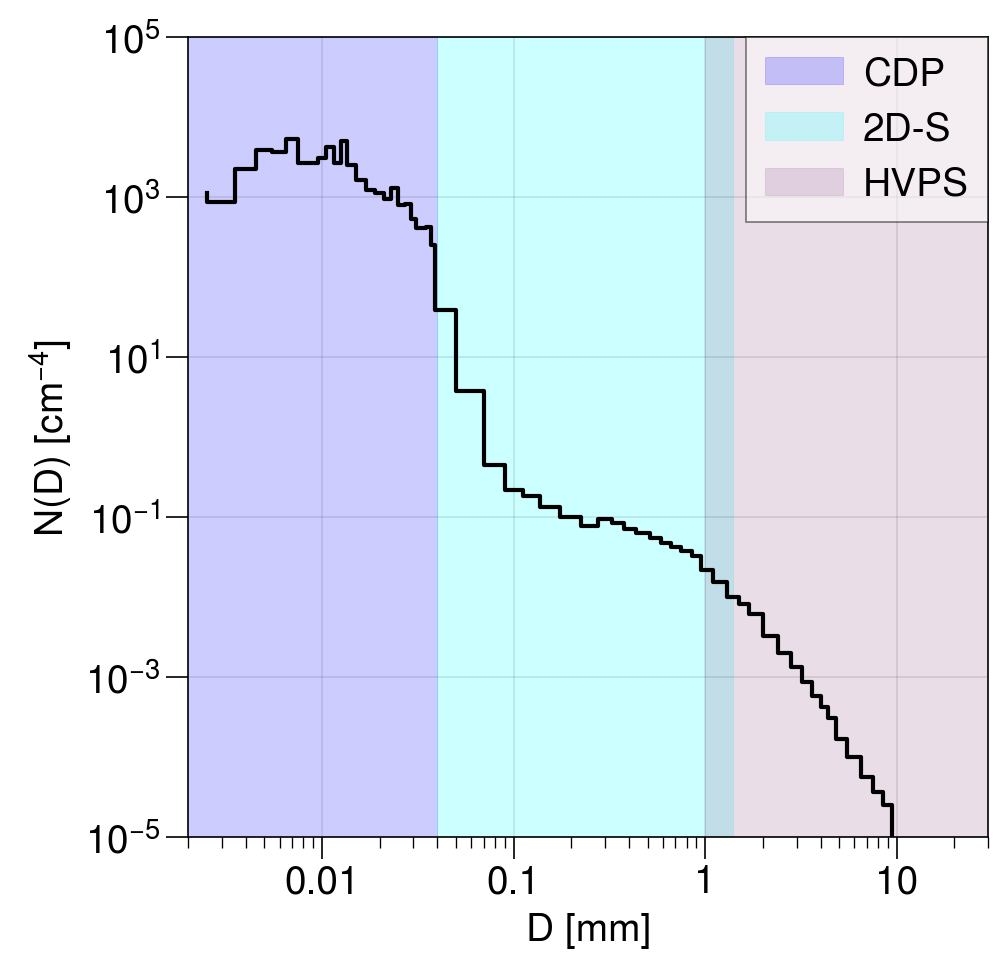

In [6]:
fig, ax = pplt.subplots(refwidth=4)
ax.fill_between(
    (0.002, 0.04), (1e5, 1e5), facecolor=pplt.set_alpha('blue', 0.2), label='CDP'
)
ax.fill_between(
    (0.04, 1.4), (1e5, 1e5), facecolor=pplt.set_alpha('cyan', 0.2), label='2D-S'
)
ax.fill_between(
    (1, 30), (1e5, 1e5), facecolor=pplt.set_alpha('purple', 0.2), label='HVPS'
)
ax.step(bin_center, np.nanmean(ND, axis=1), c='k', where='mid')
ax.format(
    xlabel='D [mm]', xlim=(2e-3, 30), xscale='log',
    ylabel='N(D) [cm$^{-4}$]', ylim=(1e-5, 1e5), yscale='log', yformatter='log'
)
ax.legend(loc='ur', ncols=1, alpha=0.5)